# Your Goal: Your task it to predict listening time of a podcast episode.



In [ ]:
# Root Mean Squared Error (RMSE)
# Submissions are scored on the root mean squared error. RMSE is defined as:

# RMSE=(1N∑i=1N(yi−yˆi)2)12

# where yˆi
#  is the predicted value and yi
#  is the original value for each instance i
# .

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [9]:
train_data.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [10]:
test_data.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


In [11]:
train_data.isna().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [12]:
test_data.isna().sum()

id                                 0
Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         28736
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    48832
Number_of_Ads                      0
Episode_Sentiment                  0
dtype: int64

In [13]:
print(train_data.shape) 

(750000, 12)


In [14]:
print(test_data.shape) 

(250000, 11)


# EDA

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [16]:
train_data.duplicated().sum()

0

In [17]:
train_data.isnull().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [18]:
test_data.isnull().sum()

id                                 0
Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         28736
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    48832
Number_of_Ads                      0
Episode_Sentiment                  0
dtype: int64

In [19]:
train_data.isnull().sum()/len(train_data)*100

id                              0.000000
Podcast_Name                    0.000000
Episode_Title                   0.000000
Episode_Length_minutes         11.612400
Genre                           0.000000
Host_Popularity_percentage      0.000000
Publication_Day                 0.000000
Publication_Time                0.000000
Guest_Popularity_percentage    19.470667
Number_of_Ads                   0.000133
Episode_Sentiment               0.000000
Listening_Time_minutes          0.000000
dtype: float64

In [20]:
test_data.isnull().sum()/len(test_data)*100


id                              0.0000
Podcast_Name                    0.0000
Episode_Title                   0.0000
Episode_Length_minutes         11.4944
Genre                           0.0000
Host_Popularity_percentage      0.0000
Publication_Day                 0.0000
Publication_Time                0.0000
Guest_Popularity_percentage    19.5328
Number_of_Ads                   0.0000
Episode_Sentiment               0.0000
dtype: float64

In [21]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

In [22]:
train_data[['Episode_Length_minutes', 'Guest_Popularity_percentage']] = imputer.fit_transform(train_data[['Episode_Length_minutes','Guest_Popularity_percentage']])
test_data[['Episode_Length_minutes', 'Guest_Popularity_percentage']] = imputer.transform(test_data[['Episode_Length_minutes', 'Guest_Popularity_percentage']])


In [23]:
train_data.isnull().sum()

id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  1
Episode_Sentiment              0
Listening_Time_minutes         0
dtype: int64

In [24]:
test_data.isnull().sum()

id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
dtype: int64

In [25]:
train_data.shape

(750000, 12)

In [26]:
test_data.shape

(250000, 11)

In [27]:
train_data.columns

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment', 'Listening_Time_minutes'],
      dtype='object')

In [28]:
test_data.columns

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment'],
      dtype='object')

In [29]:
train_data.describe()


,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,750000.000000,750000.000000,750000.000000,749999.000000,750000.000000
mean,374999.500000,64.841494,59.859901,52.881040,1.348855,45.437406
std,216506.495284,31.346004,22.873098,26.094641,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,39.160000,39.410000,33.750000,0.000000,23.178350
50%,374999.500000,64.504738,60.050000,53.590000,1.000000,43.379460
75%,562499.250000,91.160000,79.530000,72.560000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


In [59]:
# Save the cleaned train data
train_data.to_csv("cleaned_train.csv", index=False)

# Save the cleaned test data
test_data.to_csv("cleaned_test.csv", index=False)


In [10]:
cleaned_train_data = pd.read_csv("cleaned_train.csv")
cleaned_test_data = pd.read_csv("cleaned_test.csv")

In [11]:
cleaned_train_data.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,64.504738,True Crime,74.81,Thursday,Night,52.236449,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.800000,Comedy,66.95,Saturday,Afternoon,75.950000,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.900000,Education,69.97,Tuesday,Evening,8.970000,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.170000,Technology,57.22,Monday,Morning,78.700000,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.510000,Health,80.07,Monday,Afternoon,58.680000,3.0,Neutral,75.61031


In [12]:
cleaned_train_data.isna().sum()

id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  1
Episode_Sentiment              0
Listening_Time_minutes         0
dtype: int64

In [13]:
data = cleaned_train_data.dropna()

In [14]:
data.isna().sum()

id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Listening_Time_minutes         0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 749999 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           749999 non-null  int64  
 1   Podcast_Name                 749999 non-null  object 
 2   Episode_Title                749999 non-null  object 
 3   Episode_Length_minutes       749999 non-null  float64
 4   Genre                        749999 non-null  object 
 5   Host_Popularity_percentage   749999 non-null  float64
 6   Publication_Day              749999 non-null  object 
 7   Publication_Time             749999 non-null  object 
 8   Guest_Popularity_percentage  749999 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            749999 non-null  object 
 11  Listening_Time_minutes       749999 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 74.4+ MB


In [16]:
data.shape

(749999, 12)

In [17]:
# data['Episode_Title'] = data['Episode_Title'].str.replace('Episode ', '', regex=False)


In [18]:
data.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,64.504738,True Crime,74.81,Thursday,Night,52.236449,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.800000,Comedy,66.95,Saturday,Afternoon,75.950000,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.900000,Education,69.97,Tuesday,Evening,8.970000,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.170000,Technology,57.22,Monday,Morning,78.700000,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.510000,Health,80.07,Monday,Afternoon,58.680000,3.0,Neutral,75.61031


In [19]:
data.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,749999.000000,749999.000000,749999.000000,749999.000000,749999.000000,749999.000000
mean,374999.670440,64.841533,59.859944,52.881044,1.348855,45.437435
std,216506.589306,31.346007,22.873082,26.094658,1.151130,27.138313
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.500000,39.160000,39.410000,33.750000,0.000000,23.178350
50%,375000.000000,64.504738,60.050000,53.590000,1.000000,43.379460
75%,562499.500000,91.160000,79.530000,72.560000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 749999 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           749999 non-null  int64  
 1   Podcast_Name                 749999 non-null  object 
 2   Episode_Title                749999 non-null  object 
 3   Episode_Length_minutes       749999 non-null  float64
 4   Genre                        749999 non-null  object 
 5   Host_Popularity_percentage   749999 non-null  float64
 6   Publication_Day              749999 non-null  object 
 7   Publication_Time             749999 non-null  object 
 8   Guest_Popularity_percentage  749999 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            749999 non-null  object 
 11  Listening_Time_minutes       749999 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 74.4+ MB


In [21]:
# Identify numerical and categorical columns
# train_data
train_numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
train_categorical_cols = data.select_dtypes(include=['object']).columns

print(train_numeric_cols.shape)
print(train_categorical_cols.shape)

(6,)
(6,)


In [22]:
print(train_numeric_cols)
print(train_categorical_cols)

Index(['id', 'Episode_Length_minutes', 'Host_Popularity_percentage',
       'Guest_Popularity_percentage', 'Number_of_Ads',
       'Listening_Time_minutes'],
      dtype='object')
Index(['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day',
       'Publication_Time', 'Episode_Sentiment'],
      dtype='object')


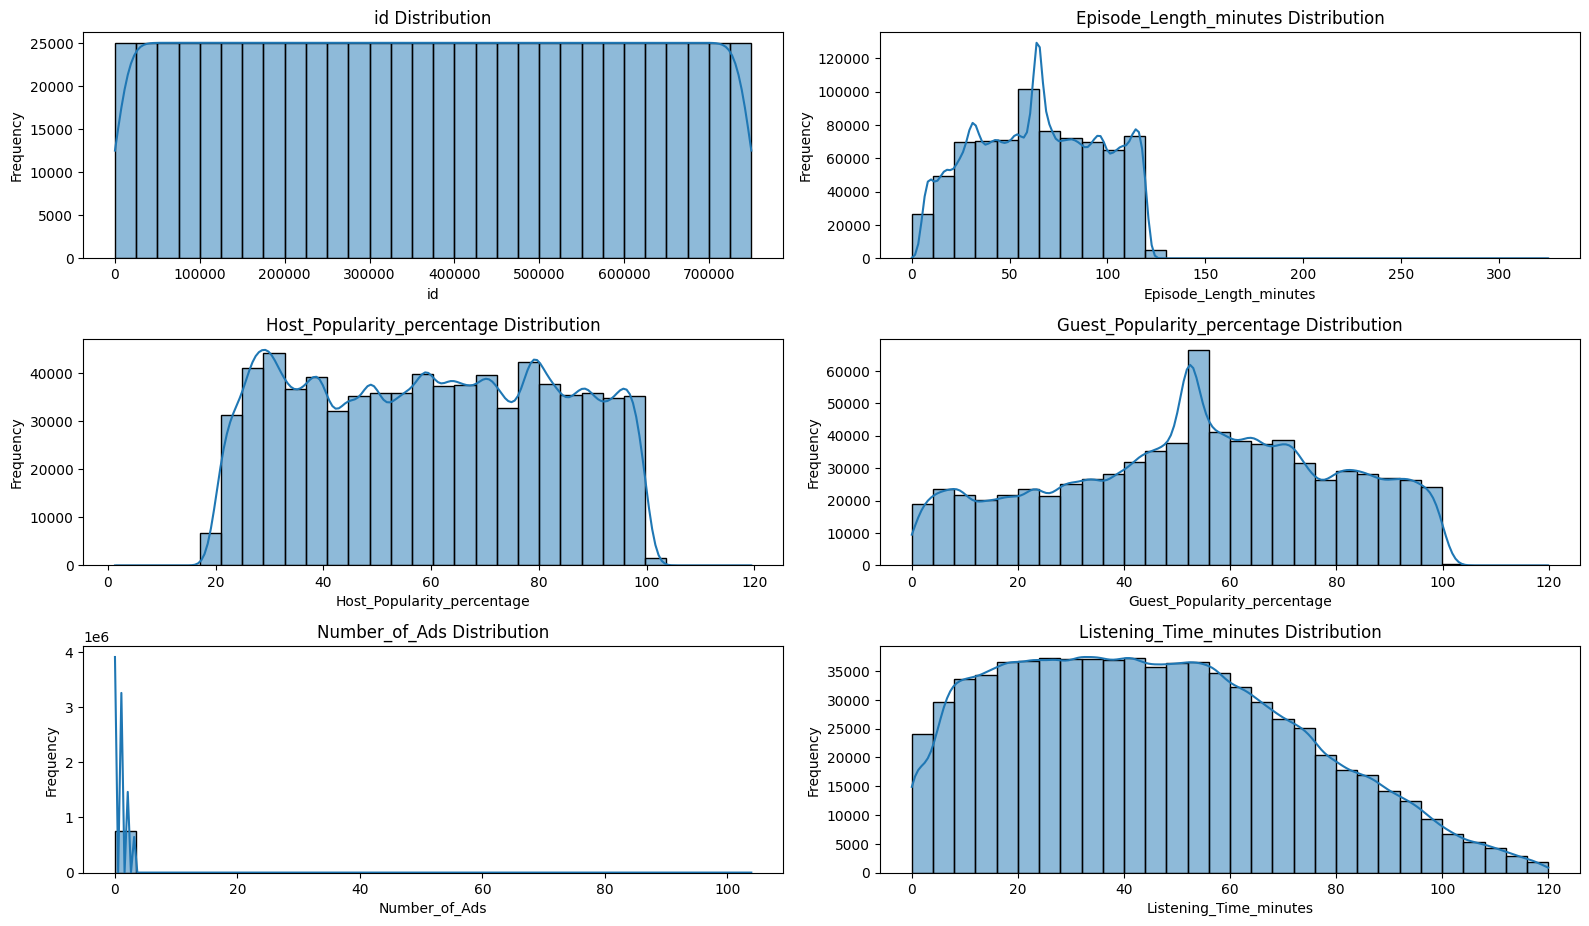

In [23]:
# Plotting the histograms with KDE for each numerical feature

plt.figure(figsize=(16, 12))
for i, col in enumerate(train_numeric_cols):
    plt.subplot(len(train_numeric_cols) // 2 + 1, 2, i + 1)  
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

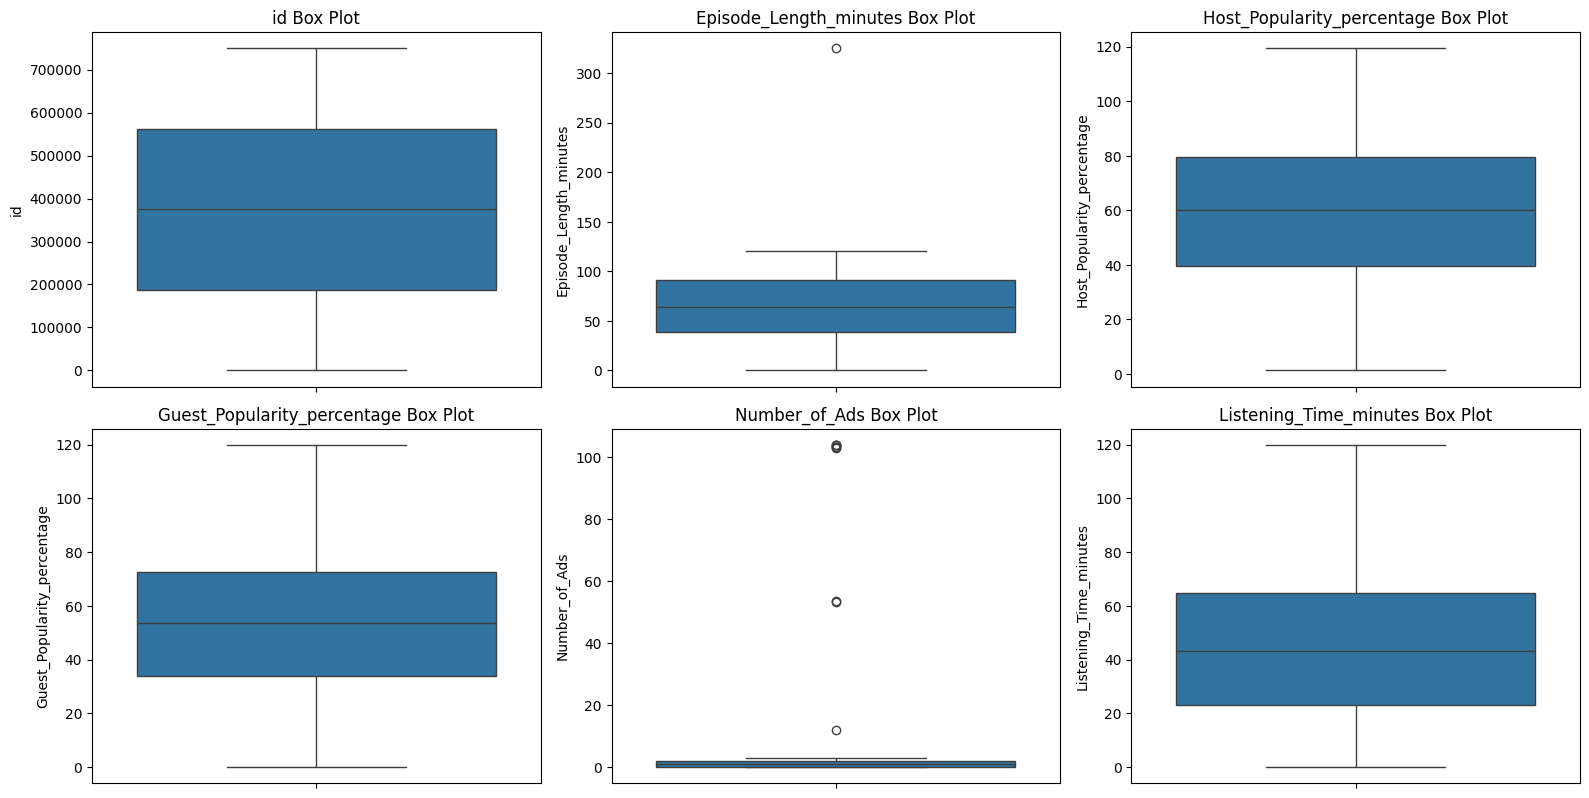

In [24]:
# check outlier in numeric data 
# box plot
plt.figure(figsize=(16, 12))
for i, col in enumerate(train_numeric_cols):
    plt.subplot(3, 3, i + 1)  
    sns.boxplot(y=data[col])  
    plt.title(f'{col} Box Plot')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [25]:
data['Number_of_Ads']

0         0.0
1         2.0
2         0.0
3         2.0
4         3.0
         ... 
749995    0.0
749996    2.0
749997    0.0
749998    0.0
749999    0.0
Name: Number_of_Ads, Length: 749999, dtype: float64

<Axes: >

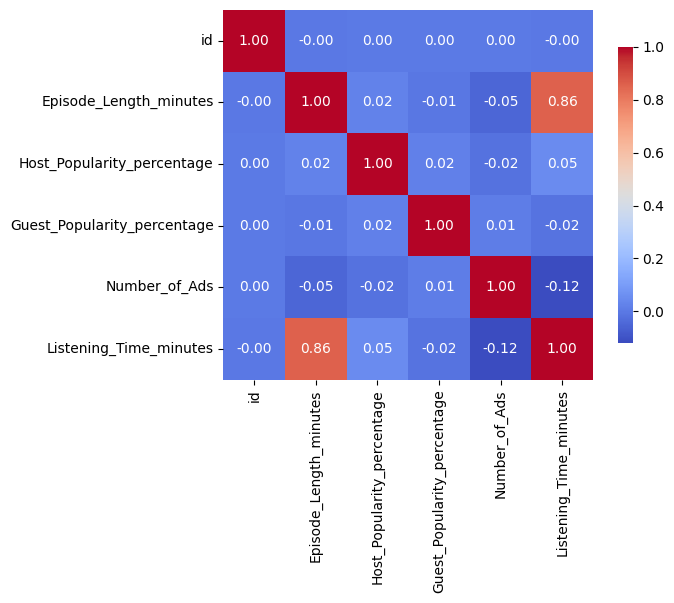

In [26]:
sns.heatmap(data[train_numeric_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})


In [27]:
data[train_categorical_cols].head()

,Podcast_Name,Episode_Title,Genre,Publication_Day,Publication_Time,Episode_Sentiment
0,Mystery Matters,Episode 98,True Crime,Thursday,Night,Positive
1,Joke Junction,Episode 26,Comedy,Saturday,Afternoon,Negative
2,Study Sessions,Episode 16,Education,Tuesday,Evening,Negative
3,Digital Digest,Episode 45,Technology,Monday,Morning,Positive
4,Mind & Body,Episode 86,Health,Monday,Afternoon,Neutral


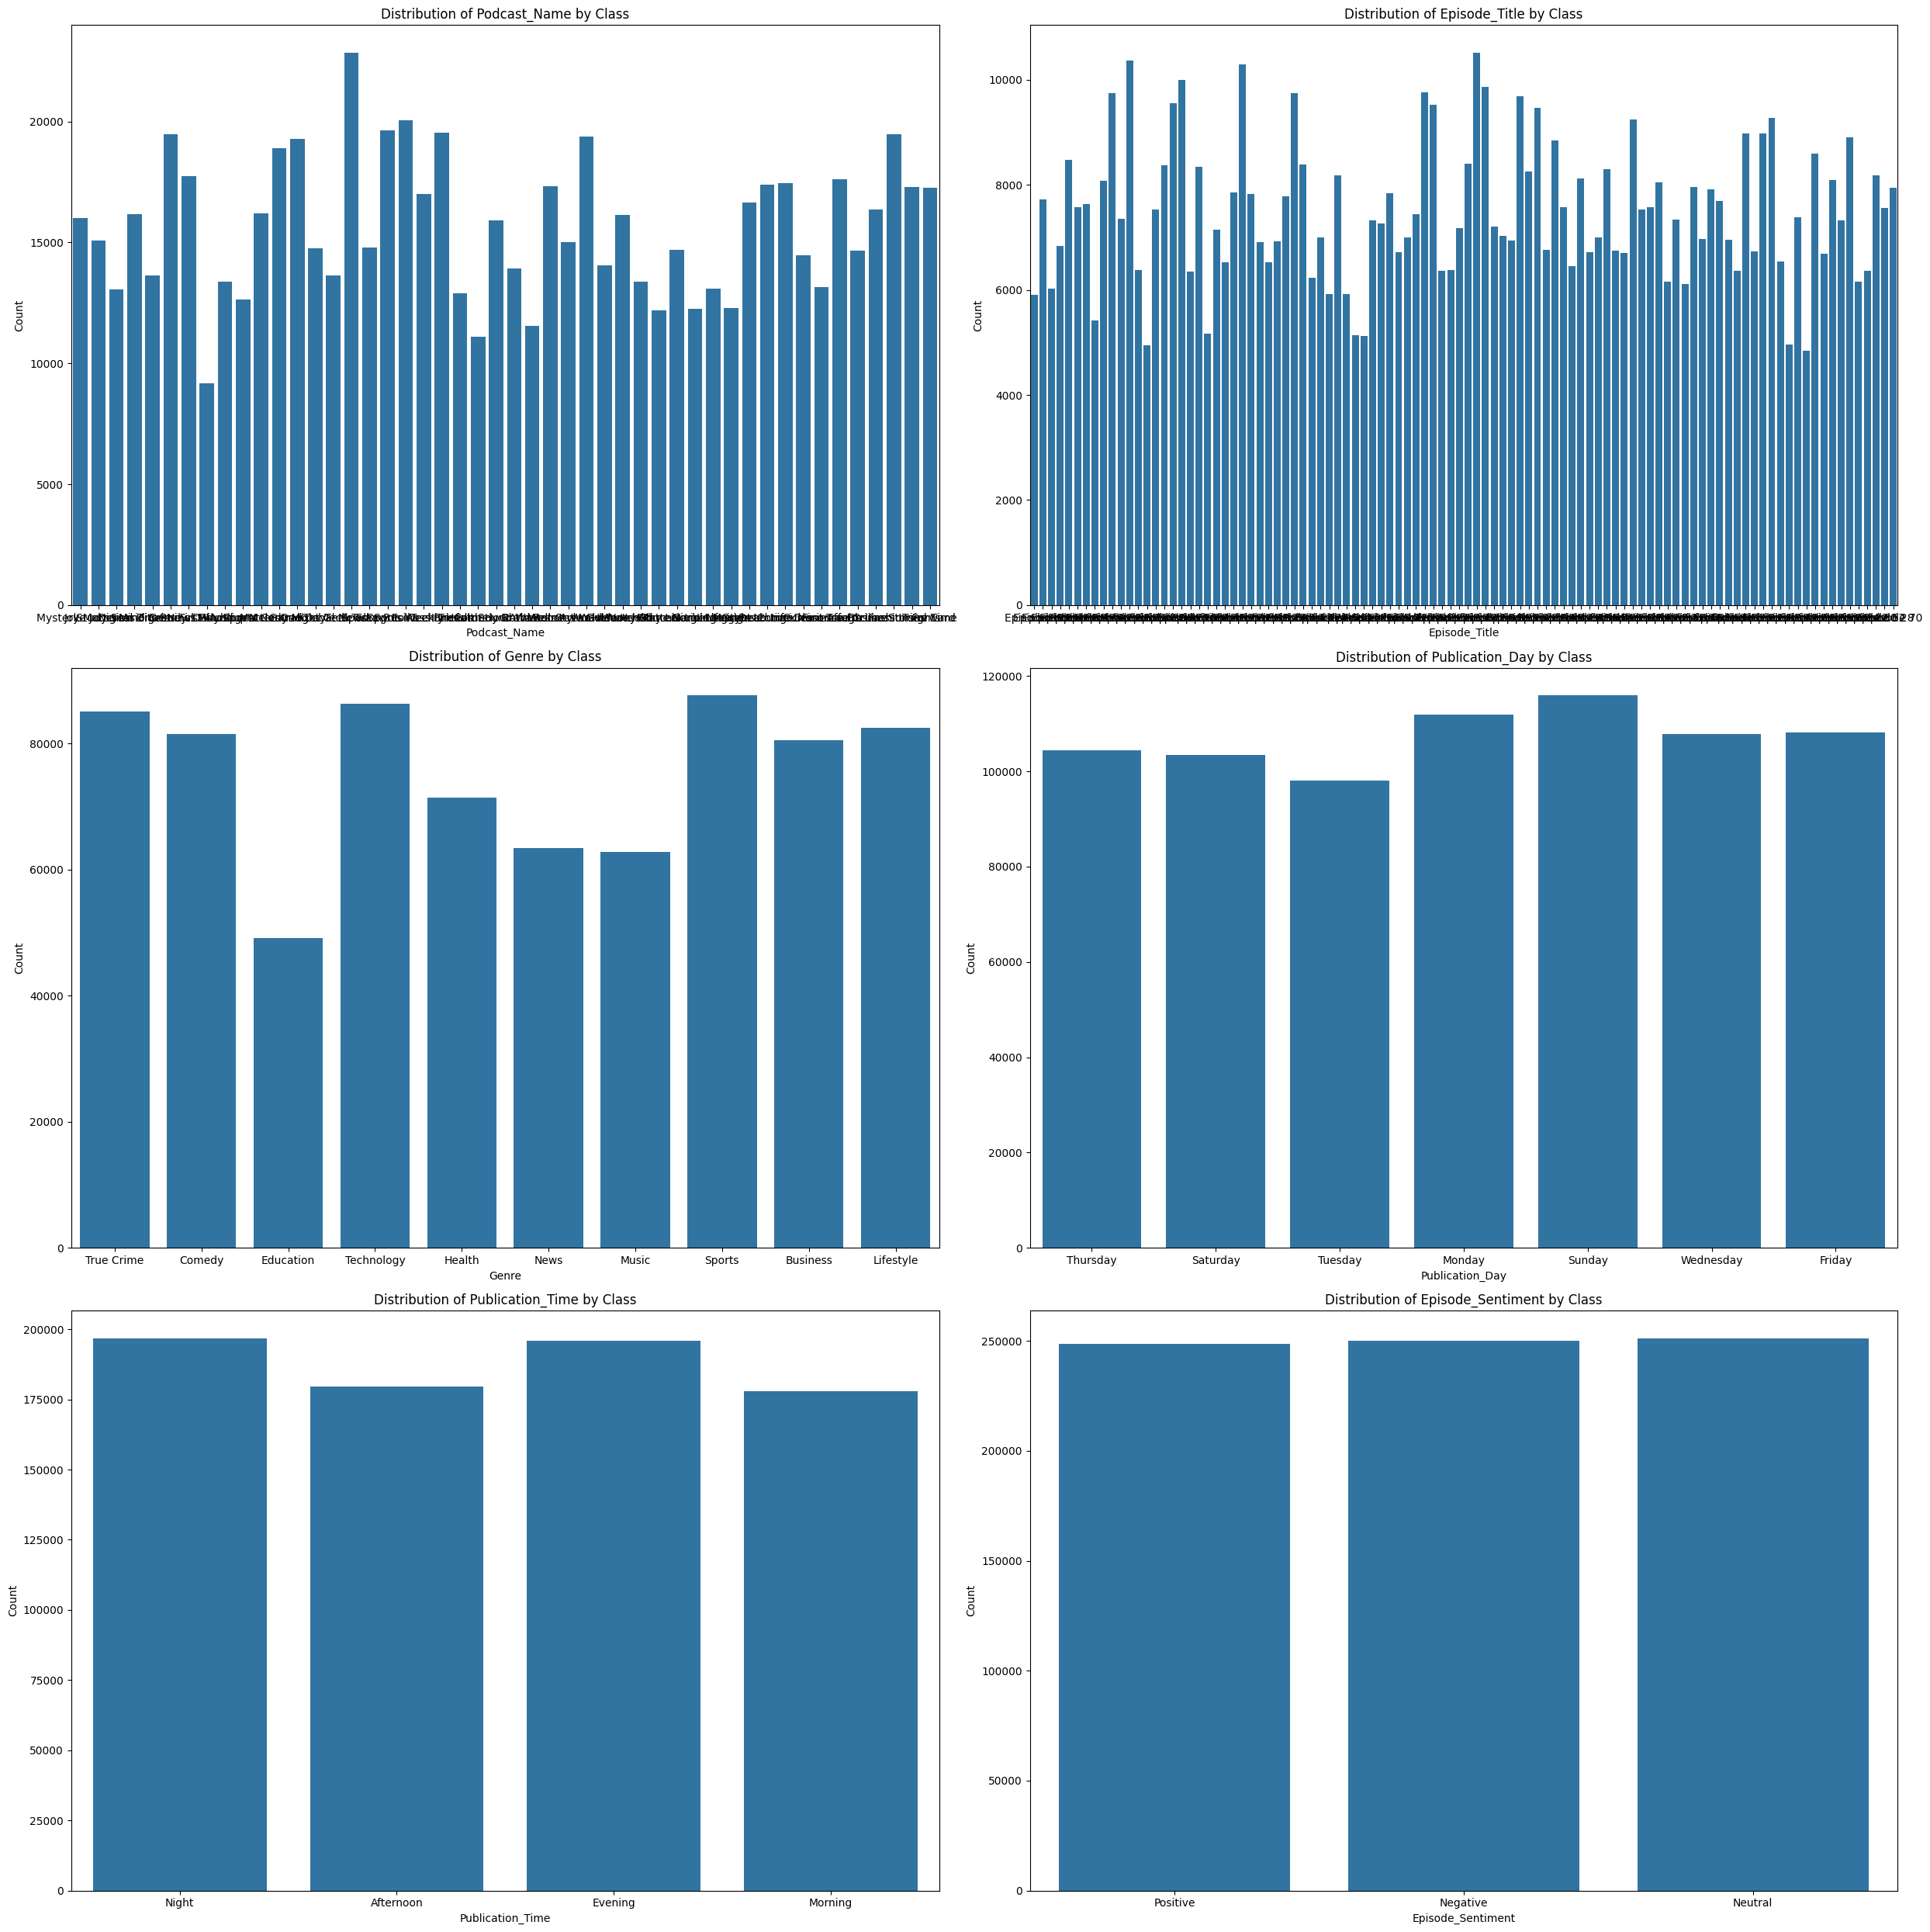

In [28]:
plt.figure(figsize=(25, 25))

for i, feature in enumerate(train_categorical_cols):
    plt.subplot((len(train_categorical_cols) + 1) // 2, 2, i + 1)  
    sns.countplot(data=data, x=feature)  
    plt.title(f'Distribution of {feature} by Class')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [29]:
for column in train_categorical_cols:
    print(f"Column: {column}")
    print(data[column].value_counts())
    print("\n")


Column: Podcast_Name
Podcast_Name
Tech Talks             22847
Sports Weekly          20053
Funny Folks            19635
Tech Trends            19549
Fitness First          19488
Business Insights      19480
Style Guide            19364
Game Day               19271
Melody Mix             18889
Criminal Minds         17735
Finance Focus          17628
Detective Diaries      17452
Crime Chronicles       17374
Athlete's Arena        17327
Fashion Forward        17280
Tune Time              17254
Business Briefs        17012
Lifestyle Lounge       16661
True Crime Stories     16373
Sports Central         16191
Digital Digest         16171
Humor Hub              16144
Mystery Matters        16002
Comedy Corner          15927
Joke Junction          15074
Wellness Wave          15009
Sport Spot             14778
Gadget Geek            14770
Home & Living          14686
Laugh Line             14673
Life Lessons           14464
World Watch            14043
Sound Waves            13928
Global Ne

In [30]:
data[train_categorical_cols].head()

,Podcast_Name,Episode_Title,Genre,Publication_Day,Publication_Time,Episode_Sentiment
0,Mystery Matters,Episode 98,True Crime,Thursday,Night,Positive
1,Joke Junction,Episode 26,Comedy,Saturday,Afternoon,Negative
2,Study Sessions,Episode 16,Education,Tuesday,Evening,Negative
3,Digital Digest,Episode 45,Technology,Monday,Morning,Positive
4,Mind & Body,Episode 86,Health,Monday,Afternoon,Neutral


In [31]:
from sklearn.preprocessing import LabelEncoder


for col in train_categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])



C:\Users\Admin\AppData\Local\Temp\ipykernel_8104\2596731018.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
C:\Users\Admin\AppData\Local\Temp\ipykernel_8104\2596731018.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
C:\Users\Admin\AppData\Local\Temp\ipykernel_8104\2596731018.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [32]:
data.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,34,98,64.504738,9,74.81,4,3,52.236449,0.0,2,31.41998
1,1,24,19,119.800000,1,66.95,2,0,75.950000,2.0,0,88.01241
2,2,40,8,73.900000,2,69.97,5,1,8.970000,0.0,0,44.92531
3,3,10,40,67.170000,8,57.22,1,2,78.700000,2.0,2,46.27824
4,4,31,85,110.510000,3,80.07,1,0,58.680000,3.0,1,75.61031


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 749999 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           749999 non-null  int64  
 1   Podcast_Name                 749999 non-null  int32  
 2   Episode_Title                749999 non-null  int32  
 3   Episode_Length_minutes       749999 non-null  float64
 4   Genre                        749999 non-null  int32  
 5   Host_Popularity_percentage   749999 non-null  float64
 6   Publication_Day              749999 non-null  int32  
 7   Publication_Time             749999 non-null  int32  
 8   Guest_Popularity_percentage  749999 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            749999 non-null  int32  
 11  Listening_Time_minutes       749999 non-null  float64
dtypes: float64(5), int32(6), int64(1)
memory usage: 57.2 MB


In [34]:
for column in train_categorical_cols:
    print(f"Column: {column}")
    print(data[column].value_counts())
    print("\n")

Column: Podcast_Name
Podcast_Name
42    22847
39    20053
15    19635
43    19549
14    19488
3     19480
41    19364
17    19271
30    18889
6     17735
13    17628
9     17452
5     17374
0     17327
12    17280
45    17254
2     17012
28    16661
44    16373
38    16191
10    16171
22    16144
34    16002
4     15927
24    15074
46    15009
37    14778
16    14770
21    14686
25    14673
27    14464
47    14043
36    13928
18    13649
31    13639
8     13391
32    13380
7     13138
29    13092
40    13053
23    12913
33    12652
26    12291
11    12245
20    12198
1     11543
19    11114
35     9169
Name: count, dtype: int64


Column: Episode_Title
Episode_Title
69    10515
59    10373
25    10292
58     9991
66     9864
      ...  
12     5134
18     5117
36     4965
31     4940
95     4838
Name: count, Length: 100, dtype: int64


Column: Genre
Genre
7    87605
8    86256
9    85059
4    82461
1    81453
0    80521
3    71416
6    63385
5    62743
2    49100
Name: count, dtype: int

In [35]:
data.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,34,98,64.504738,9,74.81,4,3,52.236449,0.0,2,31.41998
1,1,24,19,119.800000,1,66.95,2,0,75.950000,2.0,0,88.01241
2,2,40,8,73.900000,2,69.97,5,1,8.970000,0.0,0,44.92531
3,3,10,40,67.170000,8,57.22,1,2,78.700000,2.0,2,46.27824
4,4,31,85,110.510000,3,80.07,1,0,58.680000,3.0,1,75.61031


In [36]:
data[train_numeric_cols]

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
0,0,64.504738,74.81,52.236449,0.0,31.41998
1,1,119.800000,66.95,75.950000,2.0,88.01241
2,2,73.900000,69.97,8.970000,0.0,44.92531
3,3,67.170000,57.22,78.700000,2.0,46.27824
4,4,110.510000,80.07,58.680000,3.0,75.61031
...,...,...,...,...,...,...
749995,749995,75.660000,69.36,63.698000,0.0,56.87058
749996,749996,75.750000,35.21,54.342000,2.0,45.46242
749997,749997,30.980000,78.58,84.890000,0.0,15.26000
749998,749998,108.980000,45.39,93.270000,0.0,100.72939


In [37]:
numeric_cols = ['id','Podcast_Name','Episode_Title','Episode_Length_minutes','Host_Popularity_percentage','Guest_Popularity_percentage','Number_of_Ads','Listening_Time_minutes']

In [38]:
categorical_cols = []

In [39]:
data[numeric_cols].head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
0,0,34,98,64.504738,74.81,52.236449,0.0,31.41998
1,1,24,19,119.800000,66.95,75.950000,2.0,88.01241
2,2,40,8,73.900000,69.97,8.970000,0.0,44.92531
3,3,10,40,67.170000,57.22,78.700000,2.0,46.27824
4,4,31,85,110.510000,80.07,58.680000,3.0,75.61031


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

C:\Users\Admin\AppData\Local\Temp\ipykernel_8104\567864822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numeric_cols] = scaler.fit_transform(data[numeric_cols])


In [41]:
data.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,-1.732049,0.741588,1.692785,-0.010744,9,0.653610,4,3,-0.024702,-1.171766,2,-0.516519
1,-1.732044,0.034253,-1.109959,1.753286,1,0.309974,2,0,0.884050,0.565657,0,1.568815
2,-1.732039,1.165989,-1.500214,0.288983,2,0.442007,5,1,-1.682761,-1.171766,0,-0.018871
3,-1.732035,-0.956015,-0.364926,0.074283,8,-0.115417,1,2,0.989435,0.565657,2,0.030982
4,-1.732030,0.529388,1.231574,1.456916,3,0.883574,1,0,0.222228,1.434369,1,1.111819


In [42]:
data.describe()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
count,7.499990e+05,7.499990e+05,7.499990e+05,7.499990e+05,749999.000000,7.499990e+05,749999.000000,749999.000000,7.499990e+05,7.499990e+05,749999.000000,7.499990e+05
mean,-3.577351e-16,1.178555e-16,1.119438e-16,8.231222e-16,4.648785,-3.964265e-16,2.962780,1.522869,5.976715e-16,-1.633872e-16,0.997971,-3.112181e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,2.963074,1.000001e+00,1.997397,1.119362,1.000001e+00,1.000001e+00,0.815440,1.000001e+00
min,-1.732049e+00,-1.663350e+00,-1.784036e+00,-2.068575e+00,0.000000,-2.560214e+00,0.000000,0.000000,-2.026510e+00,-1.171766e+00,0.000000,-1.674292e+00
25%,-8.660258e-01,-8.852819e-01,-8.616142e-01,-8.192926e-01,2.000000,-8.940622e-01,1.000000,1.000000,-7.331407e-01,-1.171766e+00,0.000000,-8.202094e-01
50%,1.522174e-06,-3.648004e-02,2.532988e-02,-1.074443e-02,5.000000,8.309157e-03,3.000000,1.000000,2.716865e-02,-3.030544e-01,1.000000,-7.583288e-02
75%,8.660242e-01,9.537888e-01,8.413185e-01,8.396120e-01,7.000000,8.599658e-01,5.000000,3.000000,7.541378e-01,5.656575e-01,2.000000,7.139043e-01
max,1.732047e+00,1.661124e+00,1.728263e+00,8.307235e+00,9.000000,2.605687e+00,6.000000,3.000000,2.568687e+00,8.909609e+01,2.000000,2.746398e+00


<Axes: >

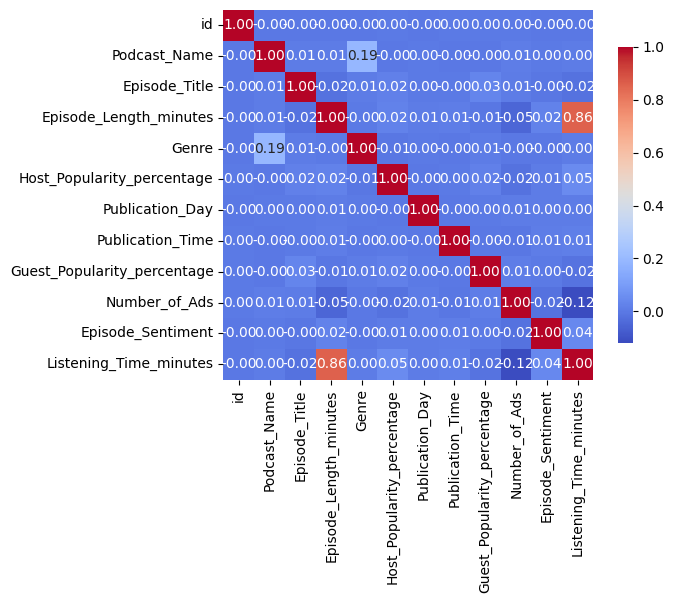

In [43]:
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})


In [44]:
y = data['Listening_Time_minutes']

In [45]:
y.shape

(749999,)

In [46]:
x = data.drop(columns='Listening_Time_minutes')

In [47]:
x.shape

(749999, 11)

In [48]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [49]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# RandomForestRegressor

In [207]:
mmodel = RandomForestRegressor(n_estimators=100)

In [208]:
mmodel.fit(X_train,y_train)

RandomForestRegressor()

In [209]:
mmodel.score(X_train,y_train)

0.9662342746232206

In [210]:
mmodel.score(X_test,y_test)

0.7609517992875025

In [ ]:
model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 150,200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}



In [51]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


KeyboardInterrupt: 

# Linear regression

In [211]:
from sklearn.linear_model import LinearRegression
regg_model = LinearRegression()
regg_model.fit(X_train, y_train)


LinearRegression()

In [212]:
regg_model.score(X_train,y_train)

0.7403325509178414

In [213]:
regg_model.score(X_test,y_test)

0.7433478229706143

# stacking

In [52]:
from sklearn.ensemble import RandomForestRegressor,StackingRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
base_models = [
    ('linear', LinearRegression()),
    ('ridge', Ridge()),
    ('lasso', Lasso()),
    ('svr', SVR(C=1.0, epsilon=0.1, gamma='scale')),
    ('knn', KNeighborsRegressor()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gbr', GradientBoostingRegressor(n_estimators=100, random_state=42))
]
meta_model = LinearRegression()

stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

stacking_model.fit(X_train, y_train)